# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [26]:
# Carregamento dos pacotes necessários
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [27]:
# Carregamento da base e criação das variáveis necessárias
tips = sns.load_dataset("tips")
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [28]:
# Modelo de Regressão de 'tip' explicada por 'net_bill'
# Nomeando 'reg1' o objeto que representa a regressão em questão:
reg1 = smf.ols('tip ~ net_bill', data = tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 26 May 2023   Prob (F-statistic):           5.02e-23
Time:                        16:02:58   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.45)

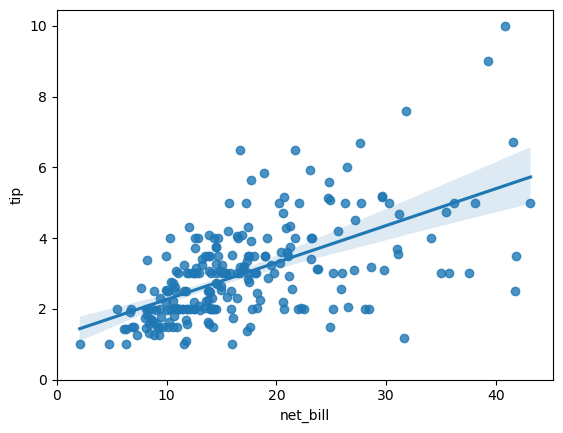

In [29]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct'] < .5])

# Visualização da origem (0, 0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [30]:
# Modelo de regressão da variável 'tip_pct' por 'net_bill', identificado como reg2
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.52e-06
Time:                        16:02:58   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.505398619388979)

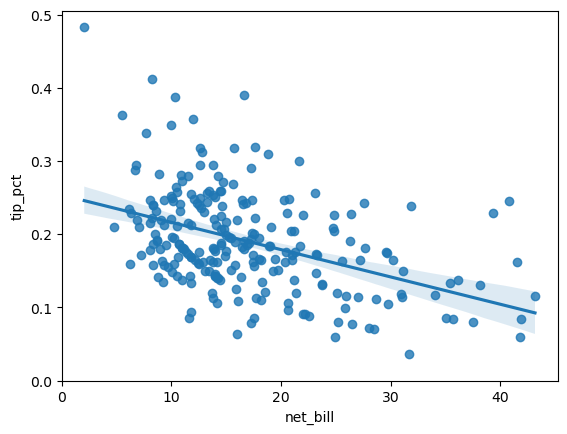

In [31]:
# Gráfico de dispersão de 'tip_pct' por 'net_bill'
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct'] < .5])

# Visualização da origem (0, 0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

 No primeiro gráfico, na qual é colocado o valor da gorjeta em função da conta efetiva do cliente (na qual a gorjeta é desconsiderada), observa-se que o a gorjeta tende a aumentar com o valor da conta, uma vez que o ajuste linear apresenta um coeficiente angular positivo (net_bill = 0.0993(9)). Isto leva a pensar que a porcentagem da conta que é convertida em gorjeta também tende a aumentar com o valor da conta. Entretanto, é exatamente o contrário que é verificado no segundo gráfico, na qual a porcentagem convertida em gorjeta tende a diminuir com o aumento do valor da conta (tanto visualmente quanto pelo coeficiente angular do ajuste, que é negativo: net_bill = -0.006(1)). 
 
Os R²s não podem ser comparados diretamente, uma vez que não são utilizados os mesmos valores nos dois gráficos, implicando que hajam MSEs (erros quadráticos médios) diferentes e, consequentemente, R² diferente para cada gráfico.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [32]:
# Obtenção dos valores preditos para tip_pct
pred_tip_pct = reg2.fittedvalues
pred_tip_pct

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [33]:
# Obtenção dos valores preditos para tip através do valor anterior * net_bill
pred_tip = pred_tip_pct * tips['net_bill']
pred_tip

0      3.309254
1      2.186938
2      3.461450
3      3.668785
4      3.699998
         ...   
239    3.773120
240    3.790751
241    3.684707
242    3.319003
243    3.287232
Length: 244, dtype: float64

In [34]:
# Obtenção do R² para os valores preditos de tip
reg2 = smf.ols('tip ~ pred_tip', data = tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     33.35
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.35e-08
Time:                        16:02:59   Log-Likelihood:                -409.20
No. Observations:                 244   AIC:                             822.4
Df Residuals:                     242   BIC:                             829.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7229      0.403      1.795      0.074      -0.070       1.516
pred_tip       0.7589      0.131      5.775      0.000       0.500       1.018
==============================================================================
Omnibus:                      121.831   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.924
Skew:                           1.974   Prob(JB):                    2.73e-142
Kurtosis:                       9.967   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² obtido através do ajuste de tip como seus respectivos valores preditos (R² = 0.121) foi inferior ao calculado no item 1 (R² = 0.333). Dessa forma, o novo ajuste apresentou uma qualidade inferior ao realizado no item 1. 